In [1]:
import matplotlib.pyplot as plt
import numpy as np  # Often used for data generation
import pandas as pd
import seaborn as sns

In [2]:
# Create DataFrame with meaningful columns and realistic data
data = {
    "Customer_ID": range(1, 21),
    "Age": np.random.randint(20, 65, 20),
    "Income": np.random.randint(20000, 100000, 20),
    "Education_Level": np.random.choice(["High School", "Bachelor's", "Master's", "PhD"], 20),
    "Location": np.random.choice(["Urban", "Rural"], 20),
    "Purchase_History": np.random.randint(100, 1000, 20),
    "Last_Purchase_Amount": np.random.randint(50, 500, 20),
    "Product_Category_Preference": np.random.choice(["Electronics", "Clothing", "Home Goods", "Food"], 20),
    "Website_Visits": np.random.randint(5, 20, 20),
    "Avg_Time_on_Website": np.random.randint(100, 800, 20)
}

df = pd.DataFrame(data)

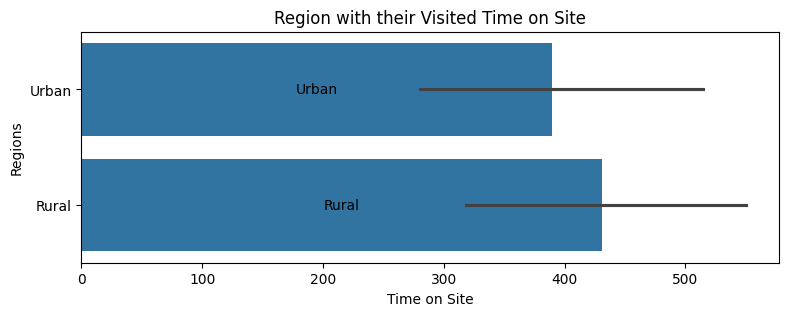

In [3]:
fig, ax = plt.subplots(figsize=(9, 3))  # Adjust figsize as needed

tmp_df = df.copy()

tmp_df = tmp_df.sort_values(by='Avg_Time_on_Website', ascending=False)

sns.barplot(x = tmp_df['Avg_Time_on_Website'], y=tmp_df['Location'], orient='h', data=tmp_df,
            order=['Urban','Rural'],
            ax=ax)

lbs = ['Urban','Rural']

ax.bar_label(ax.containers[-1], labels=lbs,label_type='center')

plt.title('Region with their Visited Time on Site')
plt.xlabel('Time on Site')
plt.ylabel('Regions')
plt.show()

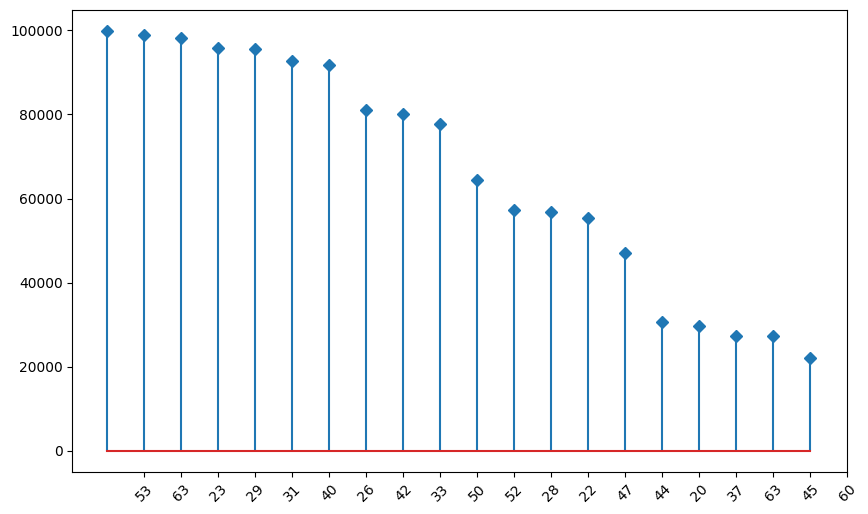

In [4]:
fig, ax = plt.subplots(figsize=(10,6))

tmp_df = df.copy()
tmp_df = tmp_df.sort_values(by='Income', ascending=False)
plt.stem(tmp_df['Income'],markerfmt='D')
my_range=range(1,len(tmp_df['Age'])+1)
plt.xticks( my_range, tmp_df['Age'], rotation=45)

plt.show()

In [5]:
pcp = df.groupby(by='Product_Category_Preference')

tmp_df= pcp.agg({'Location':'count',
             'Income': 'sum',
             'Purchase_History': 'sum',
            'Avg_Time_on_Website': 'sum',
            'Website_Visits': 'sum'})

tmp_df

,Location,Income,Purchase_History,Avg_Time_on_Website,Website_Visits
Product_Category_Preference,,,,,
Clothing,2,150123,1692,1326,33
Electronics,8,575263,3904,3153,94
Food,6,408892,3126,1999,71
Home Goods,4,196069,2202,1766,42


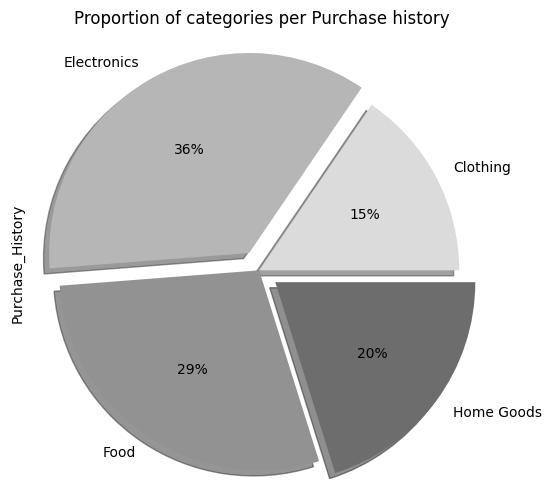

In [6]:
plt.figure(figsize=(6,6))
tmp_df['Purchase_History'].plot.pie(autopct = "%1.0f%%", colors = sns.color_palette("binary"), shadow = True,
                          explode=(0, 0.1, 0, 0.1))

plt.title('Proportion of categories per Purchase history')
plt.axis('equal')
plt.show()

In [7]:
ed = df.groupby(by='Education_Level')

tmped_df = ed.agg({'Location':'count',
             'Income': 'sum',
             'Purchase_History': 'sum',
            'Avg_Time_on_Website': 'sum',
            'Website_Visits': 'sum'})

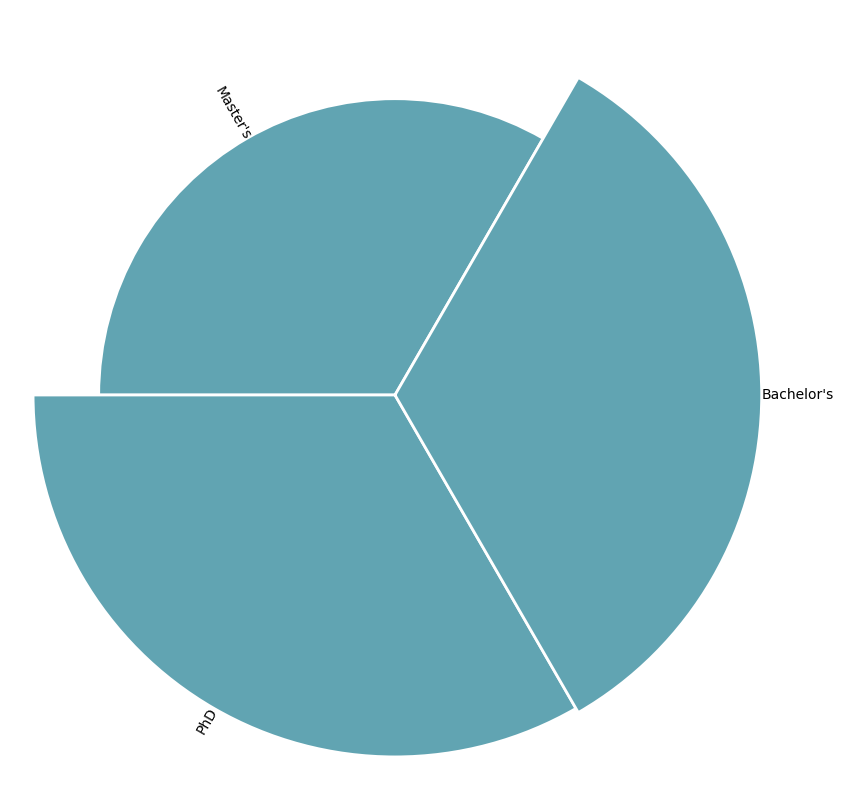

In [8]:
# Reorder the dataframe
dataf = tmped_df['Income'].to_frame()
dataf = dataf.sort_values(by=['Income'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = dataf['Income'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * dataf['Income'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(dataf.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(dataf.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, dataf.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

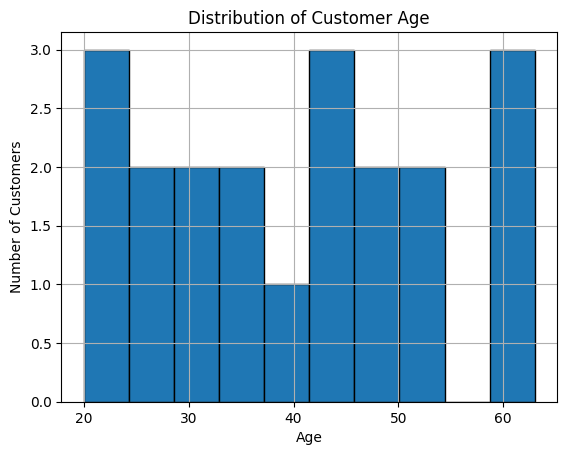

In [9]:
plt.hist(data["Age"], bins=10, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Age")
plt.grid(True)
plt.show()

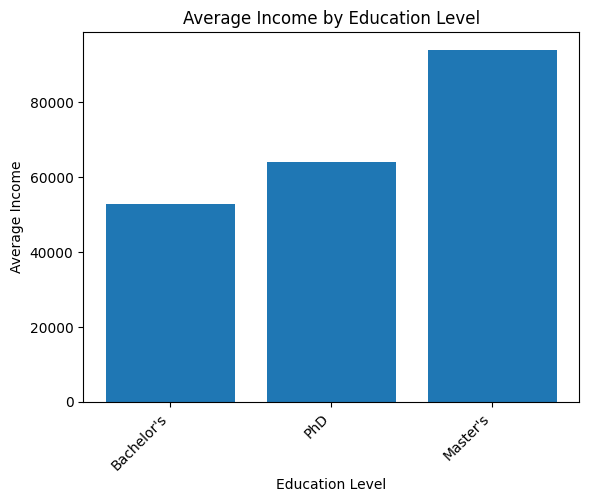

In [10]:
plt.bar(df["Education_Level"].unique(), df.groupby("Education_Level")["Income"].mean())
plt.xlabel("Education Level")
plt.ylabel("Average Income")
plt.title("Average Income by Education Level")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

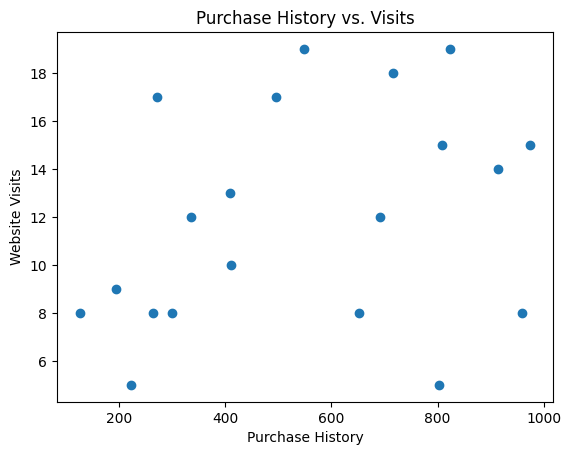

In [11]:
plt.scatter(df["Purchase_History"], df["Website_Visits"])
plt.xlabel("Purchase History")
plt.ylabel("Website Visits")
plt.title("Purchase History vs. Visits")
plt.show()

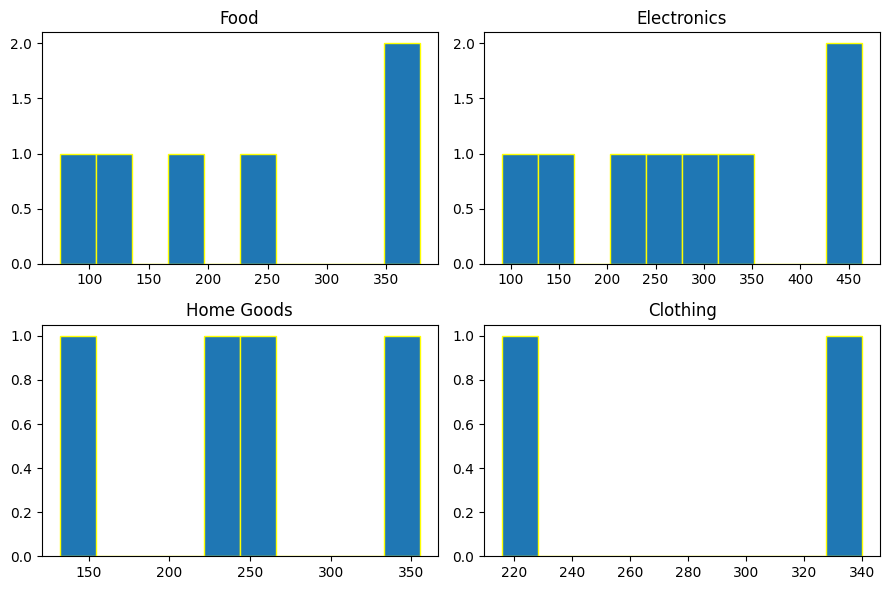

In [12]:
categories = df["Product_Category_Preference"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

fig, axs = plt.subplots(2, 2, figsize=(9, 6))

for i, category in enumerate(categories):
    ax = axs.flat[i]
    ax.hist(df[df["Product_Category_Preference"] == category]["Last_Purchase_Amount"], edgecolor="yellow")
    ax.set_title(category)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()